In [1]:
import numpy as np         #numpy is used for most of the mathematical (as np ables us to use it as a shortcut)
import matplotlib.pyplot as plt     # for charts and graphs
import pandas as pd

dataset = pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')   

dataset.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [2]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", df.describe().transpose())

# Call the function
get_df_info(dataset)


Shape of DataFrame:  (2392, 15)

Columns in DataFrame:  ['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']

Data types of columns:
 StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-n

array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

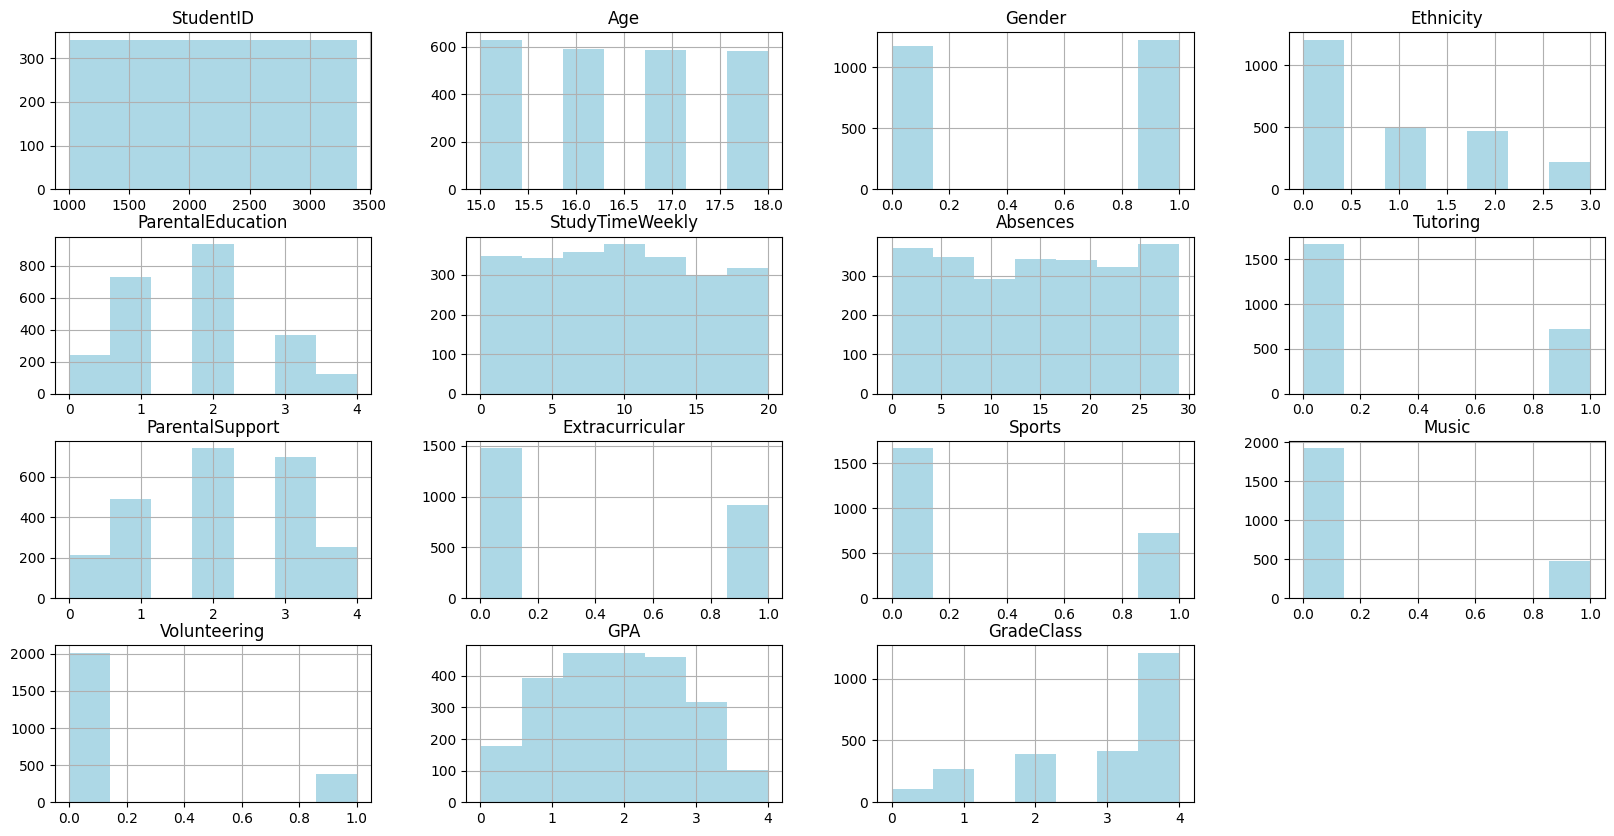

In [3]:
dataset.hist(figsize=(20,10),bins=7, color='lightblue')

In [4]:
X= dataset.iloc[:, 1:13].values        # stores all the values of the columns except the last one (because last one is dependant )
y= dataset.iloc[:, 14].values 

print(X)
print(y)



[[17.  1.  0. ...  0.  1.  0.]
 [18.  0.  0. ...  0.  0.  0.]
 [15.  0.  2. ...  0.  0.  0.]
 ...
 [16.  1.  0. ...  0.  0.  1.]
 [16.  1.  1. ...  1.  1.  0.]
 [16.  1.  0. ...  0.  0.  1.]]
[2. 1. 4. ... 2. 1. 1.]


In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
column = X[:,2].reshape(-1, 1)
onehotencoder =OneHotEncoder()    
# inside brackets specifies that first column needs to be labeled
efc= onehotencoder.fit_transform(column).toarray()
X = np.hstack((X[:, 0:2], efc[:,1:],X[:, 3:])) #dummy variable removed



In [6]:
print(X[:3,:])

[[17.          1.          0.          0.          0.          2.
  19.83372281  7.          1.          2.          0.          0.
   1.          0.        ]
 [18.          0.          0.          0.          0.          1.
  15.40875606  0.          0.          1.          0.          0.
   0.          0.        ]
 [15.          0.          0.          1.          0.          3.
   4.21056977 26.          0.          2.          0.          0.
   0.          0.        ]]


In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
column = y.reshape(-1, 1)
onehotencoder =OneHotEncoder()    
# inside brackets specifies that first column needs to be labeled
efc= onehotencoder.fit_transform(column).toarray()
y = efc
print(y)

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2, random_state=0)





In [9]:



from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [10]:
pip install scikeras tensorflow


INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 86.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.2 MB/s eta 0:00:00:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-lea

In [11]:
pip install scikeras


Note: you may need to restart the kernel to use updated packages.


In [12]:
# buildinf the ANN
import keras
from keras.models import Sequential

from keras.layers import Dense, Dropout, BatchNormalization


#intitialize ANN
classifier = Sequential()

# maiking the first hidden layer
classifier.add(Dense(units= 16, kernel_initializer = 'uniform', activation= 'relu', input_dim=14))
classifier.add(Dropout(0.3))
classifier.add(BatchNormalization())

# adding second layer
classifier.add(Dense(units= 16, kernel_initializer = 'uniform', activation= 'relu'))
classifier.add(Dropout(0.3))
classifier.add(BatchNormalization())


# adding second layer
classifier.add(Dense(units= 16, kernel_initializer = 'uniform', activation= 'relu'))
classifier.add(Dropout(0.3))
classifier.add(BatchNormalization())



#adding the output layer
classifier.add(Dense(units= 5, kernel_initializer = 'uniform', activation= 'softmax'))

#compiling sll the layers
classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


#fitting into train set
classifier.fit(X_train,y_train,batch_size=10, epochs= 150,validation_split=0.15)


2024-07-01 18:40:14.069739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 18:40:14.107216: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 18:40:14.107289: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3758 - loss: 1.5252 - val_accuracy: 0.4564 - val_loss: 1.4546
Epoch 2/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6104 - loss: 1.0978 - val_accuracy: 0.4564 - val_loss: 1.1798
Epoch 3/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6071 - loss: 1.0177 - val_accuracy: 0.6028 - val_loss: 0.9650
Epoch 4/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6245 - loss: 1.0043 - val_accuracy: 0.7317 - val_loss: 0.8750
Epoch 5/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6336 - loss: 0.9696 - val_accuracy: 0.7003 - val_loss: 0.8529
Epoch 6/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6474 - loss: 0.9178 - val_accuracy: 0.7282 - val_loss: 0.8395
Epoch 7/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6103 - loss: 0.9500 - val_accuracy: 0.7003 - val_loss: 0.8346
Epoch 8/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6420 - loss: 0.9698 - val_accu

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[  0  16   3   4   5]
 [  0  35  15   3   2]
 [  0   3  49  19   5]
 [  0   0  13  58  24]
 [  0   1   1  16 207]]


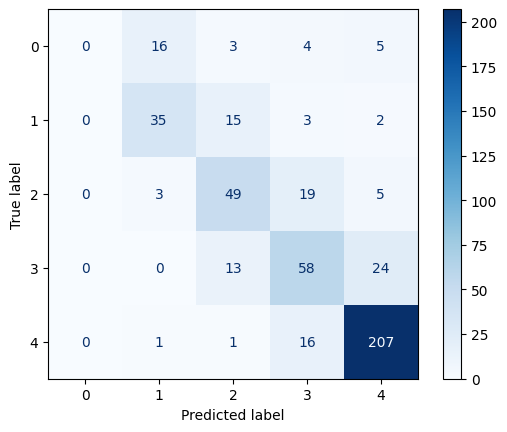

In [13]:
y_pred = classifier.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# Ensure y_test is the true class labels, not one-hot encoded
y_true = np.argmax(y_test, axis=1)  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)

print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()